# Latar Belakang

Sebuah badan riset kerja membutuhkan data tentang  pekerjaan yang dibutuhkan oleh perusahaan dibidang data.Kemudian tim analis data melakukan penelitian menyeluruh terkait sejumlah variabel, termasuk struktur gaji, lingkungan kerja, skala perusahaan, jenis pekerjaan, tingkat pengalaman, lokasi tempat tinggal karyawan, dan kategori pekerjaan.

1.   Mengidentifikasi jenis pekerjaan yang paling diminati dalam industri data.
2.   Menganalisis tren struktur gaji dalam industri data berdasaskan standar kompensasi(median).
3.   Memperoleh pemahaman tentang tingkat pengalaman yang umumnya dibutuhkan dalam bidang yg paling diminati.
4.   Mengevaluasi lokasi tempat tinggal karyawan yang paling sesuai dengan kebutuhan operasional.
5.   Menganalisis tentang skala perusahaan berdasarkan kategori pekerjaan.

# Goal

Tujuan utamanya yaitu untuk memberikan rekomendasi kepada manajemen perusahaan dalam yang ingin merekrut ataupun membuat divisi yang berfokus pada data, dengan mempertimbangkan berbagai aspek pasar kerja dan kebutuhan organisasi.

# Dataset

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [3]:
!kaggle datasets download -d murilozangari/jobs-and-salaries-in-data-field-2024

  0% 0.00/127k [00:00<?, ?B/s]
100% 127k/127k [00:00<00:00, 66.1MB/s]


In [4]:
! unzip "jobs-and-salaries-in-data-field-2024.zip"

Archive:  jobs-and-salaries-in-data-field-2024.zip
  inflating: jobs_in_data_2024.csv   


In [5]:
filepath = "jobs_in_data_2024.csv"
df = pd.read_csv(filepath)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling
...,...,...,...,...,...,...,...,...,...,...,...,...
14194,2021,Senior,Full-time,Data Specialist,165000,USD,165000,United States,Remote,United States,L,Data Management and Strategy
14195,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L,Data Science and Research
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L,Data Science and Research
14197,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S,Data Science and Research


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14199 non-null  int64 
 1   experience_level    14199 non-null  object
 2   employment_type     14199 non-null  object
 3   job_title           14199 non-null  object
 4   salary              14199 non-null  int64 
 5   salary_currency     14199 non-null  object
 6   salary_in_usd       14199 non-null  int64 
 7   employee_residence  14199 non-null  object
 8   work_setting        14199 non-null  object
 9   company_location    14199 non-null  object
 10  company_size        14199 non-null  object
 11  job_category        14199 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.3+ MB


## Sorting Data
<!-- by work_year & salary -->

In [7]:
# by work_year & salary
df_sorted = df.sort_values(by=['work_year', 'salary']).reset_index(drop=True)
df_sorted.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2020,Entry-level,Part-time,ML Engineer,14000,EUR,15966,Germany,Remote,Germany,S,Machine Learning and AI
1,2020,Executive,Full-time,Staff Data Analyst,15000,USD,15000,Nigeria,In-person,Canada,M,Data Analysis
2,2020,Entry-level,Part-time,Data Scientist,19000,EUR,21669,Italy,Hybrid,Italy,S,Data Science and Research
3,2020,Entry-level,Full-time,Data Analyst,20000,EUR,22809,Portugal,Remote,Portugal,M,Data Analysis
4,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,20000,Honduras,In-person,Honduras,S,Data Analysis


## Filter Data

In [8]:
# tanpa salary & salary_currency
df_filtered = df_sorted.drop(['salary', 'salary_currency', 'company_location'], axis=1)
df_filtered.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,work_setting,company_size,job_category
0,2020,Entry-level,Part-time,ML Engineer,15966,Germany,Remote,S,Machine Learning and AI
1,2020,Executive,Full-time,Staff Data Analyst,15000,Nigeria,In-person,M,Data Analysis
2,2020,Entry-level,Part-time,Data Scientist,21669,Italy,Hybrid,S,Data Science and Research
3,2020,Entry-level,Full-time,Data Analyst,22809,Portugal,Remote,M,Data Analysis
4,2020,Mid-level,Full-time,Product Data Analyst,20000,Honduras,In-person,S,Data Analysis


## Handling Missing Value

In [9]:
# Cek missing value
df_filtered.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
work_setting          0
company_size          0
job_category          0
dtype: int64

## Handling Duplicated

In [10]:
# Hitung jumlah duplikat
df_filtered.duplicated().sum()

5493

In [11]:
df_filtered.duplicated().sum() / len(df_filtered) * 100

38.685822945277835

In [12]:
# Menampilkan contoh duplikat
df_filtered[df_filtered.duplicated(keep=False)]\
  .sort_values(by=['work_year', 'salary_in_usd'])\
  .head(6)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,work_setting,company_size,job_category
146,2021,Mid-level,Full-time,Data Scientist,90734,Germany,Hybrid,L,Data Science and Research
147,2021,Mid-level,Full-time,Data Scientist,90734,Germany,Hybrid,L,Data Science and Research
247,2021,Mid-level,Full-time,Data Engineer,200000,United States,Remote,L,Data Engineering
248,2021,Mid-level,Full-time,Data Engineer,200000,United States,Remote,L,Data Engineering
279,2022,Mid-level,Full-time,Data Engineer,24000,United States,In-person,M,Data Engineering
280,2022,Mid-level,Full-time,Data Engineer,24000,United States,In-person,M,Data Engineering


In [13]:
# Remove duplikat
df_no_duplicated = df_filtered.drop_duplicates(keep='first')\
                            .reset_index(drop=True)
df_no_duplicated.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,work_setting,company_size,job_category
0,2020,Entry-level,Part-time,ML Engineer,15966,Germany,Remote,S,Machine Learning and AI
1,2020,Executive,Full-time,Staff Data Analyst,15000,Nigeria,In-person,M,Data Analysis
2,2020,Entry-level,Part-time,Data Scientist,21669,Italy,Hybrid,S,Data Science and Research
3,2020,Entry-level,Full-time,Data Analyst,22809,Portugal,Remote,M,Data Analysis
4,2020,Mid-level,Full-time,Product Data Analyst,20000,Honduras,In-person,S,Data Analysis


In [14]:
df_no_duplicated.duplicated().sum()

0

In [15]:
df_no_duplicated.duplicated().sum() / len(df_no_duplicated) * 100

0.0

## Handling Inkonsisten

### Identifikasi Inkonsistensi

In [16]:
df_no_duplicated.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'work_setting', 'company_size',
       'job_category'],
      dtype='object')

In [17]:
df_no_duplicated['work_year'].unique()

array([2020, 2021, 2022, 2023, 2024])

In [18]:
df_no_duplicated['work_year'].dtype

dtype('int64')

In [19]:
df_no_duplicated['experience_level'].unique()

array(['Entry-level', 'Executive', 'Mid-level', 'Senior'], dtype=object)

In [20]:
df_no_duplicated['employment_type'].unique()

array(['Part-time', 'Full-time', 'Contract', 'Freelance'], dtype=object)

In [21]:
df_no_duplicated['job_title'].sort_values().unique()

array(['AI Architect', 'AI Developer', 'AI Engineer',
       'AI Product Manager', 'AI Programmer', 'AI Research Engineer',
       'AI Research Scientist', 'AI Scientist', 'AI Software Engineer',
       'AWS Data Architect', 'Admin & Data Analyst', 'Analytics Engineer',
       'Analytics Engineering Manager', 'Applied Data Scientist',
       'Applied Machine Learning Engineer',
       'Applied Machine Learning Scientist', 'Applied Scientist',
       'Autonomous Vehicle Technician', 'Azure Data Engineer',
       'BI Analyst', 'BI Data Analyst', 'BI Data Engineer',
       'BI Developer', 'Big Data Architect', 'Big Data Developer',
       'Big Data Engineer', 'Business Data Analyst',
       'Business Intelligence', 'Business Intelligence Analyst',
       'Business Intelligence Data Analyst',
       'Business Intelligence Developer',
       'Business Intelligence Engineer', 'Business Intelligence Lead',
       'Business Intelligence Manager',
       'Business Intelligence Specialist', 'Clo

In [22]:
df_no_duplicated['salary_in_usd'].dtype

dtype('int64')

In [23]:
df_no_duplicated['employee_residence'].sort_values().unique()

array(['Algeria', 'American Samoa', 'Andorra', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Belgium',
       'Bolivia, Plurinational State of', 'Bosnia and Herzegovina',
       'Brazil', 'Bulgaria', 'Canada', 'Central African Republic',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt',
       'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Honduras', 'Hong Kong', 'Hungary', 'India', 'Indonesia',
       'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Italy', 'Japan',
       'Jersey', 'Kenya', 'Korea, Republic of', 'Kuwait', 'Latvia',
       'Lebanon', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta',
       'Mauritius', 'Mexico', 'Moldova, Republic of', 'Netherlands',
       'New Zealand', 'Nigeria', 'Oman', 'Pakistan', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Romania', 'Russian Federation', 'Saudi Arabia', 'Se

In [24]:
df_no_duplicated['work_setting'].unique()

array(['Remote', 'In-person', 'Hybrid'], dtype=object)

In [25]:
df_no_duplicated['company_size'].unique()

array(['S', 'M', 'L'], dtype=object)

In [26]:
df_no_duplicated['job_category'].sort_values().unique()

array(['BI and Visualization', 'Cloud and Database', 'Data Analysis',
       'Data Architecture and Modeling', 'Data Engineering',
       'Data Management and Strategy', 'Data Quality and Operations',
       'Data Science and Research', 'Leadership and Management',
       'Machine Learning and AI'], dtype=object)

### Handling inkonsisten

In [27]:
# df_no_duplicated['work_year'] = df_no_duplicated['work_year'].astype(str)

In [28]:
map_company = {
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
}
df_no_duplicated['company_size'] = df_no_duplicated['company_size'].map(map_company)

## Handling Outlier

### Outlier Numerik

In [29]:
df_no_duplicated.describe()

,work_year,salary_in_usd
count,8706.000000,8706.000000
mean,2023.120262,146056.540891
std,0.768050,67022.325408
min,2020.000000,15000.000000
25%,2023.000000,96200.000000
50%,2023.000000,138969.000000
75%,2024.000000,185800.000000
max,2024.000000,450000.000000


<Axes: xlabel='salary_in_usd', ylabel='Count'>

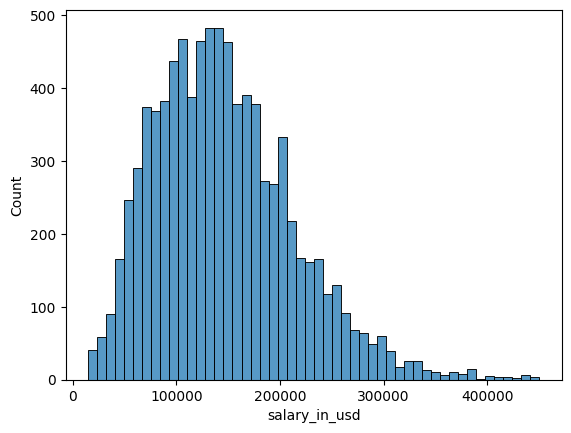

In [30]:
# Cek outlier salary_in_usd
sns.histplot(data=df_no_duplicated, x="salary_in_usd")

<Axes: xlabel='salary_in_usd'>

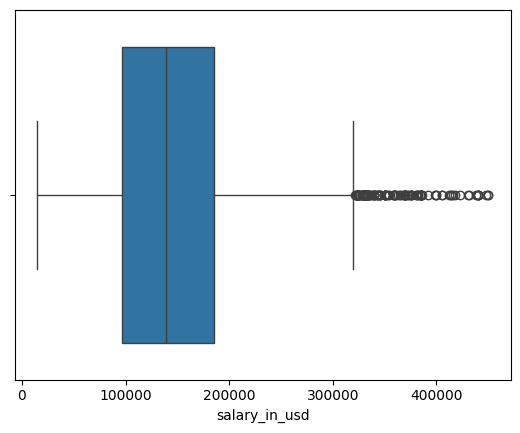

In [31]:
# Membuat boxplot salary_in_usd
sns.boxplot(data=df_no_duplicated, x='salary_in_usd')

lower: -38200.0 upper: 320200.0


Text(0.5, 1.0, 'salary in usd')

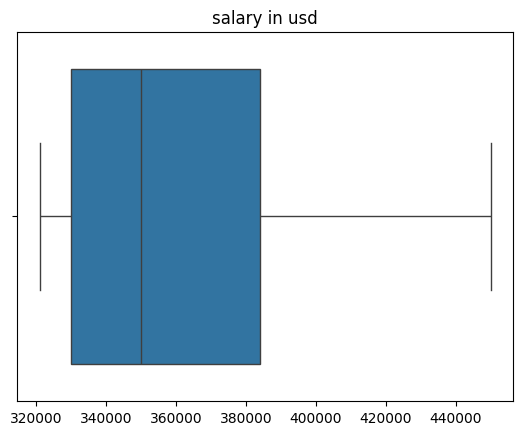

In [32]:
def detect_outliers(data):
  outliers = []
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)
  print("lower:",lower_bound, "upper:", upper_bound)
  for x in data:
    if (x<lower_bound or x>upper_bound):
      outliers.append(x)
  return outliers

# Deteksi outlier pada dataframe
outliers_df = detect_outliers(df_no_duplicated['salary_in_usd'])
sns.boxplot(data=outliers_df, orient='h')
plt.title('salary in usd')

In [33]:
df_no_duplicated[df_no_duplicated['salary_in_usd'] == df_no_duplicated['salary_in_usd'].min()]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,work_setting,company_size,job_category
1,2020,Executive,Full-time,Staff Data Analyst,15000,Nigeria,In-person,Medium,Data Analysis
71,2021,Entry-level,Full-time,Machine Learning Developer,15000,Thailand,Remote,Large,Machine Learning and AI
266,2022,Mid-level,Full-time,Business Intelligence Developer,15000,Ghana,Remote,Medium,BI and Visualization
267,2022,Entry-level,Full-time,Data Analyst,15000,Indonesia,In-person,Large,Data Analysis


In [34]:
df_no_duplicated[df_no_duplicated['salary_in_usd'] == df_no_duplicated['salary_in_usd'].max()]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,work_setting,company_size,job_category
70,2020,Mid-level,Full-time,Research Scientist,450000,United States,In-person,Medium,Data Science and Research
8705,2024,Senior,Full-time,Research Engineer,450000,United States,In-person,Medium,Data Science and Research


### Outlier Kategorik

In [35]:
list_columns = df_no_duplicated.columns
list_columns_kategorical = list_columns.drop('salary_in_usd')
list_columns_kategorical

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'employee_residence', 'work_setting', 'company_size', 'job_category'],
      dtype='object')

In [36]:
list_columns_kategorical[0]

'work_year'

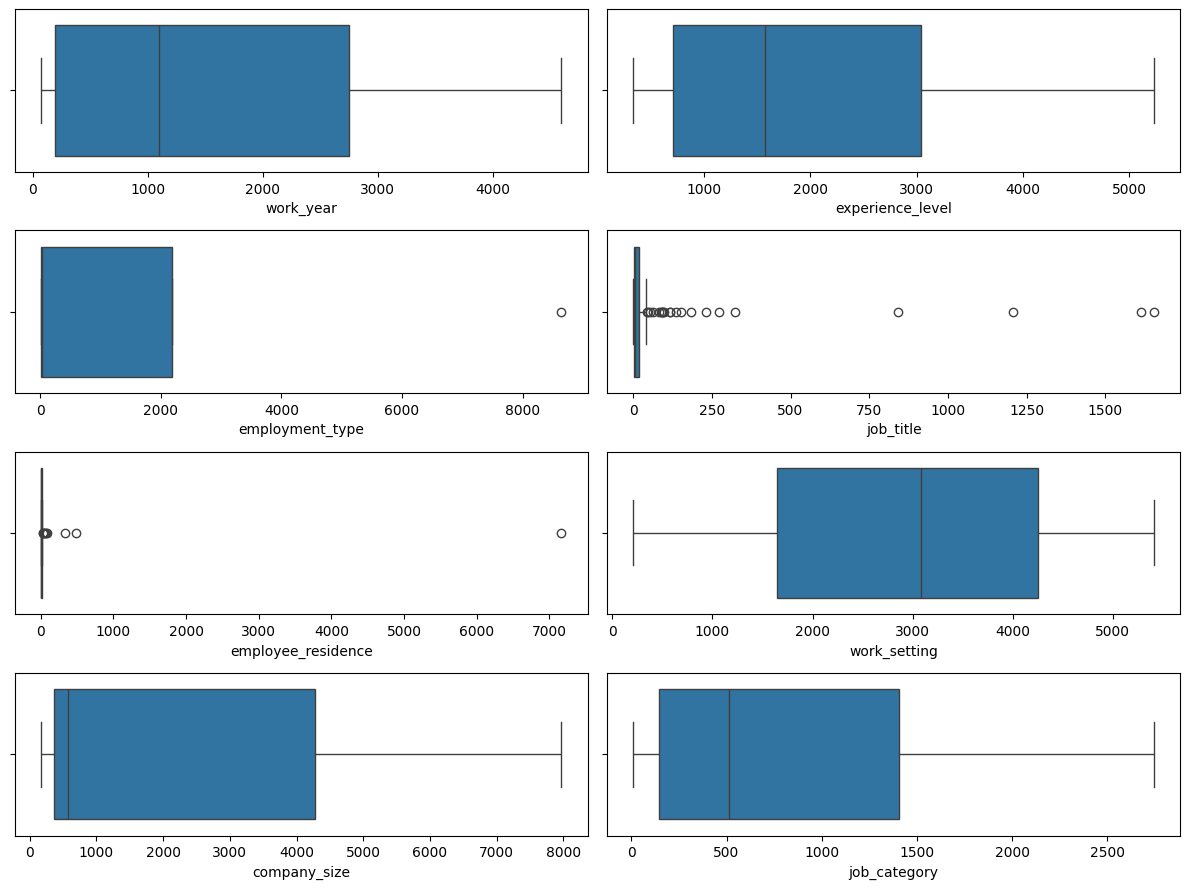

In [37]:
fig, ax = plt.subplots(4, 2, figsize=(12,9))
counter = 0

for x in range(4):
  for y in range(2):
    sns.boxplot(data=df_no_duplicated[list_columns_kategorical[counter]].value_counts(), ax=ax[x, y], orient="h")
    counter+=1

# make sure layout is not overlapping
fig.tight_layout()
# show the graphs
fig.show()

In [38]:
for kolom in list_columns_kategorical:
  modus = df_no_duplicated[kolom].mode()[0]
  print(f'Modus {kolom}: {modus}')

Modus work_year: 2023
Modus experience_level: Senior
Modus employment_type: Full-time
Modus job_title: Data Engineer
Modus employee_residence: United States
Modus work_setting: In-person
Modus company_size: Medium
Modus job_category: Data Science and Research


## Save CSV

In [39]:
df_no_duplicated.to_csv('file.csv')

## Korelasi

In [40]:
# ordinal
map_company_size = {
    'Small': 1,
    'Medium': 2,
    'Large': 3
}

# ordinal
map_jobs_level = {
    'Entry-level': 1,
    'Mid-level': 2,
    'Senior': 3,
    'Executive': 4
}

# ordinal
map_emp_type = {
    'Contract': 1,
    'Freelance': 2,
    'Part-time': 3,
    'Full-time': 4
}

map_work_set = {
    'Hybrid': 1,
    'In-person': 2,
    'Remote': 3}

ordinal_list = [map_company_size, map_jobs_level, map_emp_type, map_work_set]
map_ordinal = ['company_size', 'experience_level', 'employment_type', 'work_setting']
# one hot encoding
# df_encoded = pd.get_dummies(df_no_duplicated, columns=['work_setting'])
import copy
df_encoded = copy.deepcopy(df_no_duplicated)

df_encoded['work_year'] = df_encoded['work_year'].astype(int)

for kolom, res in zip(map_ordinal, ordinal_list):
  df_encoded[kolom] = df_encoded[kolom].map(res)

In [41]:
df_encoded.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,work_setting,company_size,job_category
0,2020,1,3,ML Engineer,15966,Germany,3,1,Machine Learning and AI
1,2020,4,4,Staff Data Analyst,15000,Nigeria,2,2,Data Analysis
2,2020,1,3,Data Scientist,21669,Italy,1,1,Data Science and Research
3,2020,1,4,Data Analyst,22809,Portugal,3,2,Data Analysis
4,2020,2,4,Product Data Analyst,20000,Honduras,2,1,Data Analysis


<ipython-input-42-3cef0663c9b1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_encoded.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")


<Axes: >

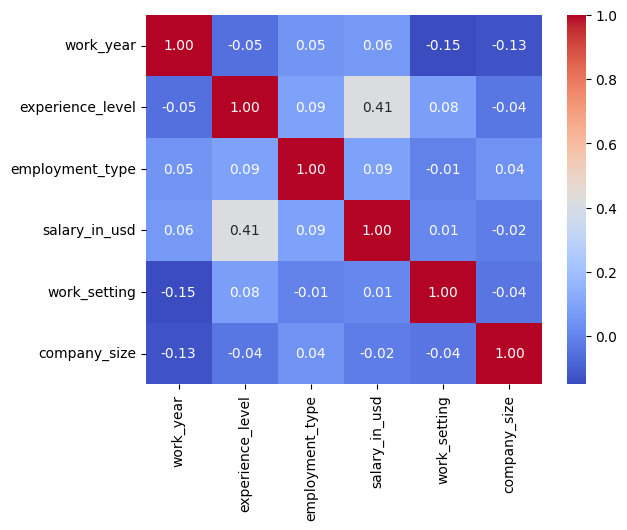

In [42]:
sns.heatmap(df_encoded.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")